<a href="https://colab.research.google.com/github/BrightonOtieno/Machine-Learning-Material/blob/master/titanicDataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tensorflow
%tensorflow_version 2.x


In [ ]:
import tensorflow as tf
print(tf.__version__)

In [ ]:
!pip install -q sklearn

In [ ]:
from __future__ import absolute_import, division, print_function, unicode_literals

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display  import clear_output
import tensorflow.compat.v2.feature_column as fc


#### get the dataset from kaggle


In [ ]:
df_train = pd.read_csv('https://storage.googleapis.com/tf-datasets/titanic/train.csv')

df_test = pd.read_csv('https://storage.googleapis.com/tf-datasets/titanic/train.csv')

# get the "survived column from both sets" this column carries the predictions
y_train = df_train.pop('survived')
y_test= df_test.pop('survived')



In [ ]:
df_test.head()
#df_test.columns


,sex,age,n_siblings_spouses,parch,fare,class,deck,embark_town,alone
0,male,22.0,1,0,7.2500,Third,unknown,Southampton,n
1,female,38.0,1,0,71.2833,First,C,Cherbourg,n
2,female,26.0,0,0,7.9250,Third,unknown,Southampton,y
3,female,35.0,1,0,53.1000,First,C,Southampton,n
4,male,28.0,0,0,8.4583,Third,unknown,Queenstown,y


In [ ]:
# df_test.n_siblings_spouses

### Exploratory  Data Analysis
#### visualizing Data , compare correlation between each feature and "survived"

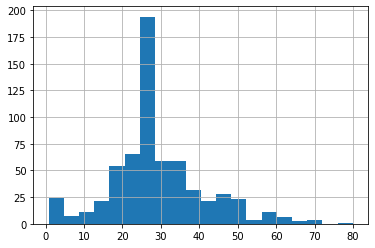

In [ ]:
df_train.age.hist(bins=20)

##### Frequency of the Ages of folks in the titanic
* most people are in there 20's and 30's 
* 25 people between age 0-5
* few outliers 70's and 80 year olds

##### Sex 


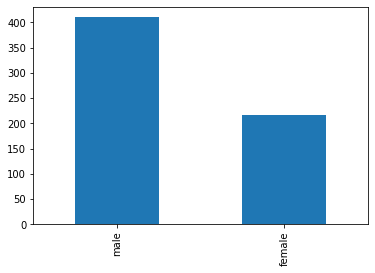

In [ ]:
df_train.sex.value_counts().plot(kind='bar')

* there were more males  than female

##### Class

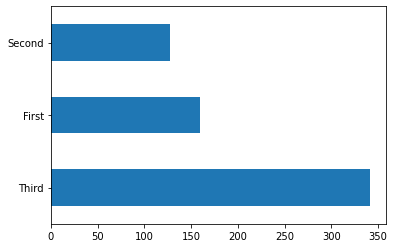

In [ ]:
df_train['class'].value_counts().plot(kind='barh')

* Most folks were in "third class"

##### % survival by sex
* **Concating the train and the y_train**
* then group by sex  
* then find average survival 
* plot with survived as x_ticks

Text(0.5, 0, 'survived')

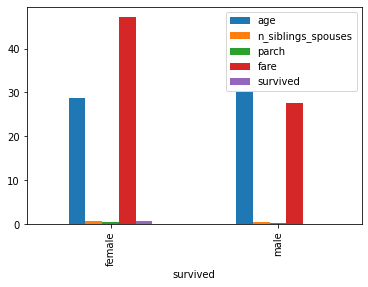

In [ ]:
pd.concat([df_train,y_train], axis=1).groupby('sex').mean().plot(kind='bar').set_xlabel('survived')

#### females have a higher chance of survival

## Encoding Categorical Data
### we have numerical Data
### Categorical Data 
### Feature Columns

In [ ]:
CATEGORICAL_COLUMNS = [
    'class',	'deck',	'embark_town',	'alone','n_siblings_spouses',	'parch','sex'                 
]

NUMERICAL_COLUMNS = [
                     'age','fare'
]

feature_columns = []
for feature_name in CATEGORICAL_COLUMNS:
  vocabulary = df_train[feature_name].unique()
  feature_columns.append(tf.feature_column.categorical_column_with_vocabulary_list(feature_name,vocabulary))


for feature_name in NUMERICAL_COLUMNS:
  feature_columns.append(tf.feature_column.numeric_column(feature_name,dtype=tf.float32))


print(feature_columns)

[VocabularyListCategoricalColumn(key='class', vocabulary_list=('Third', 'First', 'Second'), dtype=tf.string, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='deck', vocabulary_list=('unknown', 'C', 'G', 'A', 'B', 'D', 'F', 'E'), dtype=tf.string, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='embark_town', vocabulary_list=('Southampton', 'Cherbourg', 'Queenstown', 'unknown'), dtype=tf.string, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='alone', vocabulary_list=('n', 'y'), dtype=tf.string, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='n_siblings_spouses', vocabulary_list=(1, 0, 3, 4, 2, 5, 8), dtype=tf.int64, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='parch', vocabulary_list=(0, 1, 2, 5, 3, 4), dtype=tf.int64, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='sex', vocabulary_list=('male', 'female'), dtype=tf.string, def

In [ ]:
df_train.head() # us concatenating dftrain with y_train did not take place "inplace or in memeory"

,sex,age,n_siblings_spouses,parch,fare,class,deck,embark_town,alone
0,male,22.0,1,0,7.2500,Third,unknown,Southampton,n
1,female,38.0,1,0,71.2833,First,C,Cherbourg,n
2,female,26.0,0,0,7.9250,Third,unknown,Southampton,y
3,female,35.0,1,0,53.1000,First,C,Southampton,n
4,male,28.0,0,0,8.4583,Third,unknown,Queenstown,y


### Input Function

In [ ]:
def make_input_fn(data_df, label_df, num_epochs=10,shuffle=True,batch_size=32):
  def input_function():
    ds =  tf.data.Dataset.from_tensor_slices((dict(data_df), label_df))
    if shuffle:
      ds = ds.shuffle(1000)
    ds = ds.batch(batch_size).repeat(num_epochs)
    return ds 
  return input_function


train_input_fn = make_input_fn(df_train,y_train)
test_input_fn = make_input_fn(df_test,y_test,num_epochs=1, shuffle=False)

# Creating Model

In [ ]:
linear_est = tf.estimator.LinearClassifier(feature_columns= feature_columns)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmpelfjsryw', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


# Actual TRANING AND TESTING

In [ ]:
linear_est.train(train_input_fn) # Actual Training
result = linear_est.evaluate(test_input_fn) # Test model and store statistcs in "result variabl" which is a dictionary of stats
# All this displays values in console . CLEAR STUFF OUT 
clear_output()
print(result['accuracy'])

0.8133971


# MAKING PREDICTION
* **ie to see prediction of test_input_func**
* with the **same parameters / noshuffles 1 epoch**

In [ ]:
prediction = list(linear_est.predict(test_input_fn)) #list bcz we are going to loop through
#print(prediction) # list of dictionary of each datapoit with its prediction/probabailies
#print(prediction[0]) # Displays First dictionary

# Actual detail of person 3
print(df_test.loc[3])

# Get True value for person 3
print(y_test.loc[3])

print(prediction[0]['probabilities'][1])  # probability of survival

INFO:tensorflow:Calling model_fn.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpelfjsryw/model.ckpt-400
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
sex                        female
age                            35
n_siblings_spouses              1
parch                           0
fare                         53.1
class                       First
deck                            C
emb

* **1 implies this guy servived**
* **model says his survival rate was low**
* **MODEL ACCURACY ISSUES**